# Finding a DataSet
* It is well known that scraping Instagram information is not allowed and Instagram API would give us a limited dataset of public information


* Hence we find a suitable text dataset which has already been labelled as spam or not spam from Kaggle https://www.kaggle.com/team-ai/spam-text-message-classification. This process ensures that the data is reasonably clean and labels are reliable


* We create an account, download the dataset and extract it in the local directory

In [ ]:
!wget https://www.kaggle.com/team-ai/spam-text-message-classification/downloads/spam-text-message-classification.zip/1
!unzip spam-text-message-classification.zip .

# Import Dependencies
We will import standard libraries needed for 
* E - Extraction
* T - Transform ( Numpy, Pandas )
* L - Load 

###### Additionally we also import the machine learning libraries necessary for data cleaning, natural language processing and machine learning

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import re
import nltk
import string
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

# Reading the dataset
Let's read the dataset and see how many records we have and how do they look like

In [44]:
data = pd.read_csv("SPAM text message 20170820 - Data.csv") 
print( len(data) )
data.head()

5572


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# What does this mean ?
* In our case the Message represents information corresponding to a certain user that we imagine to have been obtained from their bios, comments or captions
* The label 'Category' means whether this particular record of information is 'Spam' or 'Not Spam'
* Let us make the Category description to be our label output ( y ) in the form of 0 or 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D613234BA8>]],
      dtype=object)

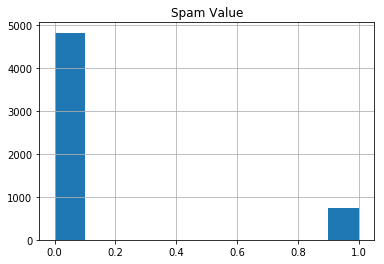

In [45]:
encoder = LabelEncoder()
unique_values_in_feature = np.unique( data[ 'Category' ].values )
encoder = encoder.fit( unique_values_in_feature )
data[ 'Category' ] = encoder.transform( data[ 'Category' ] )
data = data.rename(index=str, columns={"Category": "Spam Value", "Message": "Instagram Dummy Text"})
data.head()
data[['Spam Value']].hist()

# Data Cleaning
###### We ensure there are no duplicate records
###### We ensure there are no NaN or null values
We find that we lose about 400 records in this process

In [46]:
data = data.drop_duplicates()
data = data.dropna()
print( len( data ) )
data.head()

5157


,Spam Value,Instagram Dummy Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Text Mining
## Handle the Instagram Dummy Text
### Here we have an opportunity to use a lot of natural language processing techniques

#### Stop Words
* We get rid of stop words in the English lanugage

#### n_grams
* We consider both unigrams and bigrams

#### Lowercase
Convert each word to lowercase

## Stemming the Text
Use the NLTK word Stemmer
* First generate tokens from the text
* Then use NLTK to stem the tokens and return them to the TFIDF vectorized

In [47]:
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

## TF-IDF
* Input to the vectorizer will be the descriptions of each record. Prepare the input to the classifier in cell below
* After initializing the vectorizer we fit onto the record descriptions and convert to TF-IDF representations

In [48]:
nltk.download('punkt')
TfidfVec = TfidfVectorizer(  stop_words='english')
X = TfidfVec.fit( data['Instagram Dummy Text'] ).transform( data['Instagram Dummy Text'] )
print( type(X) )
print( X.toarray)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\uditm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<class 'scipy.sparse.csr.csr_matrix'>
<bound method _cs_matrix.toarray of <5157x8440 sparse matrix of type '<class 'numpy.float64'>'
	with 39457 stored elements in Compressed Sparse Row format>>


# Let's see what some of the most important words in the dataset were
Reference https://stackoverflow.com/questions/34232190/scikit-learn-tfidfvectorizer-how-to-get-top-n-terms-with-highest-tf-idf-score
### We indeed get some interesting results and it's difficult to interpret the word cloud at this point in time

In [49]:
feature_array = np.array(TfidfVec.get_feature_names())
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]
top_n = feature_array[tfidf_sorting][:100]

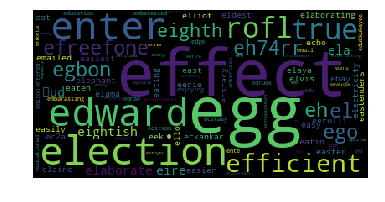

['rofl' 'true' 'effect' 'effects' 'efficient' 'efreefone' 'egbon' 'egg'
 'el' 'eggs' 'ego' 'eh' 'eh74rr' 'eighth' 'eightish' 'eire' 'ã€¨ud'
 'elaborate' 'ela' 'elaborating' 'elaine' 'elama' 'elaya' 'eldest'
 'election' 'elections' 'electricity' 'elephant' 'elliot' 'ello' 'elvis'
 'em' 'eerulli' 'eerie' 'emailed' 'eckankar' 'easier' 'easiest' 'easily'
 'east' 'eastenders' 'easter' 'easy' 'eat' 'eaten' 'eatin' 'eating' 'ebay'
 'ec2a' 'echo' 'ecstacy' 'eek' 'ecstasy' 'ed' 'edge' 'edhae' 'edison'
 'edition' 'edrunk' 'edu' 'education' 'educational' 'edukkukayee' 'edward'
 'edwards' 'ee' 'email' 'embarassed' 'ears' 'embarassing' 'enjoying'
 'enketa' 'enna' 'ennal' 'ente' 'enter' 'entered' 'enters' 'entertain'
 'entertaining' 'entey' 'entire' 'entirely' 'entitled' 'entrepreneurs'
 'entropication' 'entry' 'entry41' 'enufcredeit' 'enuff' 'envelope'
 'environment' 'envy' 'epi' 'eppolum' 'epsilon' 'equally' 'er' 'ere'
 'enjoyin']


In [50]:
%matplotlib inline 
wordcloud = WordCloud().generate( ' '.join( top_n )  )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
print( top_n )

### Towards Machine Learning
# Classifier Pipeline
* Shuffle and split the data into training and test set
* Use the random forest classifier to train on using tfidf representations of vectors to predict the points bucket number
* Test on the test set and measure accuracy

In [53]:
y = data[['Spam Value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) #X_tfidf, X_cat, X
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
predictions = clf.predict(X_test)
accuracy_score( predictions, y_test )

0.9612403100775194

# Thus, we see did very well on the test set with a 96.12% accuracy !
What does that even mean though ?

In [56]:
from sklearn.metrics import classification_report
print(classification_report( predictions, y_test, target_names=['Spam', 'Not Spam']))

             precision    recall  f1-score   support

       Spam       1.00      0.96      0.98      1384
   Not Spam       0.74      0.98      0.84       164

avg / total       0.97      0.96      0.96      1548

